In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("mymy.csv")

In [160]:
# 시각화를 위한 한글 폰트 설정
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [161]:
df.head()

,Unnamed: 0,Unnamed: 0.1,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,...,가전,농수축,생활용품,속옷,이미용,잡화,침구,무관,여성,남성
0,0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,...,0,0,0,0,0,0,0,0,0,1
1,1,1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,...,0,0,0,0,0,0,0,0,1,0
2,2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,...,0,0,0,0,0,0,0,0,0,1
3,3,3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,...,0,0,0,0,0,0,0,0,1,0
4,4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,...,0,0,0,0,0,0,0,0,0,1


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37372 entries, 0 to 37371
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    37372 non-null  int64  
 1   Unnamed: 0.1  37372 non-null  int64  
 2   방송일시          37372 non-null  object 
 3   노출(분)         20588 non-null  float64
 4   마더코드          37372 non-null  int64  
 5   상품코드          37372 non-null  int64  
 6   상품명           37372 non-null  object 
 7   상품군           37372 non-null  object 
 8   판매단가          37372 non-null  int64  
 9   취급액           37372 non-null  int64  
 10  월             37372 non-null  int64  
 11  일             37372 non-null  int64  
 12  요일            37372 non-null  int64  
 13  수량            37372 non-null  float64
 14  의류            37372 non-null  int64  
 15  주방            37372 non-null  int64  
 16  가구            37372 non-null  int64  
 17  건강기능          37372 non-null  int64  
 18  가전            37372 non-nu

In [163]:
pd.set_option('mode.chained_assignment',  None)

In [164]:
# 이상치 처리1
filtering_outlier = df.query('취급액 > 180000000')
filtering_outlier_index = list(filtering_outlier.index)

for i in filtering_outlier_index:
    tmp = df.loc[i,'마더코드']
    df.loc[i,'취급액'] = df[df['마더코드'] == tmp].sort_values(by='취급액' ,ascending=False)['취급액'].iloc[2]

In [165]:
# 이상치 처리2
filtering = df[df['취급액']==50000].index
mydata = df.drop(filtering)

In [166]:
df.dropna(subset=['취급액'], inplace=True)


In [167]:
df['노출(분)'].isnull().sum()

16784

In [168]:
df['노출(분)']= df['노출(분)'].fillna(method='pad')
df['노출(분)']

0        20.0
1        20.0
2        20.0
3        20.0
4        20.0
         ... 
37367    20.0
37368    20.0
37369    20.0
37370    20.0
37371    20.0
Name: 노출(분), Length: 37372, dtype: float64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 37371
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    37372 non-null  int64  
 1   Unnamed: 0.1  37372 non-null  int64  
 2   방송일시          37372 non-null  object 
 3   노출(분)         37372 non-null  float64
 4   마더코드          37372 non-null  int64  
 5   상품코드          37372 non-null  int64  
 6   상품명           37372 non-null  object 
 7   상품군           37372 non-null  object 
 8   판매단가          37372 non-null  int64  
 9   취급액           37372 non-null  int64  
 10  월             37372 non-null  int64  
 11  일             37372 non-null  int64  
 12  요일            37372 non-null  int64  
 13  수량            37372 non-null  float64
 14  의류            37372 non-null  int64  
 15  주방            37372 non-null  int64  
 16  가구            37372 non-null  int64  
 17  건강기능          37372 non-null  int64  
 18  가전            37372 non-nu

In [117]:
list(df.columns.values)

['Unnamed: 0',
 'Unnamed: 0.1',
 '방송일시',
 '노출(분)',
 '마더코드',
 '상품코드',
 '상품명',
 '상품군',
 '판매단가',
 '취급액',
 '월',
 '일',
 '요일',
 '수량',
 '의류',
 '주방',
 '가구',
 '건강기능',
 '가전',
 '농수축',
 '생활용품',
 '속옷',
 '이미용',
 '잡화',
 '침구',
 '무관',
 '여성',
 '남성']

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 37371
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    37372 non-null  int64  
 1   Unnamed: 0.1  37372 non-null  int64  
 2   방송일시          37372 non-null  object 
 3   노출(분)         37372 non-null  float64
 4   마더코드          37372 non-null  int64  
 5   상품코드          37372 non-null  int64  
 6   상품명           37372 non-null  object 
 7   상품군           37372 non-null  object 
 8   판매단가          37372 non-null  int64  
 9   취급액           37372 non-null  int64  
 10  월             37372 non-null  int64  
 11  일             37372 non-null  int64  
 12  요일            37372 non-null  int64  
 13  수량            37372 non-null  float64
 14  의류            37372 non-null  int64  
 15  주방            37372 non-null  int64  
 16  가구            37372 non-null  int64  
 17  건강기능          37372 non-null  int64  
 18  가전            37372 non-nu

In [119]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1','상품코드', '상품군','상품명','수량'], axis=1) 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 37371
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   방송일시    37372 non-null  object 
 1   노출(분)   20588 non-null  float64
 2   마더코드    37372 non-null  int64  
 3   판매단가    37372 non-null  int64  
 4   취급액     37372 non-null  int64  
 5   월       37372 non-null  int64  
 6   일       37372 non-null  int64  
 7   요일      37372 non-null  int64  
 8   의류      37372 non-null  int64  
 9   주방      37372 non-null  int64  
 10  가구      37372 non-null  int64  
 11  건강기능    37372 non-null  int64  
 12  가전      37372 non-null  int64  
 13  농수축     37372 non-null  int64  
 14  생활용품    37372 non-null  int64  
 15  속옷      37372 non-null  int64  
 16  이미용     37372 non-null  int64  
 17  잡화      37372 non-null  int64  
 18  침구      37372 non-null  int64  
 19  무관      37372 non-null  int64  
 20  여성      37372 non-null  int64  
 21  남성      37372 non-null  int64  
dty

In [120]:
df['방송일시']=pd.to_datetime(df['방송일시'])

In [ ]:
df.set_index('방송일시', inplace=True)

In [92]:
df

,노출(분),마더코드,판매단가,취급액,월,일,요일,의류,주방,가구,...,가전,농수축,생활용품,속옷,이미용,잡화,침구,무관,여성,남성
방송일시,,,,,,,,,,,,,,,,,,,,,
2019-01-01 06:00:00,20.0,100346,39900,2099000,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01 06:00:00,20.0,100346,39900,4371000,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-01-01 06:20:00,20.0,100346,39900,3262000,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-01-01 06:20:00,20.0,100346,39900,6955000,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2019-01-01 06:40:00,20.0,100346,39900,6672000,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:40:00,20.0,100448,148000,10157000,12,31,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2020-01-01 00:00:00,20.0,100448,178000,50929000,1,1,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2020-01-01 00:00:00,20.0,100448,168000,104392000,1,1,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
# Timestamp를 Period로 변환

dates = ['2019-01-01 06:00:00','2019-04-01 06:00:00','2019-04-01 06:00:00',
         '2019-07-01 06:00:00','2019-10-01 06:00:00']

ts_dates= pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2019-01-01 06:00:00', '2019-04-01 06:00:00',
               '2019-04-01 06:00:00', '2019-07-01 06:00:00',
               '2019-10-01 06:00:00'],
              dtype='datetime64[ns]', freq=None)

In [98]:
# Timpestamp 를 Period 변환
pr_day = ts_dates.to_period(freq='D') # 1일의 기간
pr_month = ts_dates.to_period(freq='M') # 1개월의 기간
pr_year = ts_dates.to_period(freq='A') # 1년의 기간

pr_day , pr_month , pr_year

(PeriodIndex(['2019-01-01', '2019-04-01', '2019-04-01', '2019-07-01',
              '2019-10-01'],
             dtype='period[D]', freq='D'),
 PeriodIndex(['2019-01', '2019-04', '2019-04', '2019-07', '2019-10'], dtype='period[M]', freq='M'),
 PeriodIndex(['2019', '2019', '2019', '2019', '2019'], dtype='period[A-DEC]', freq='A-DEC'))

In [101]:
tm_ms = pd.date_range(start = '2019-01-01 00:06:00', 
                      end = None, 
                      periods = 12,
                      freq = 'MS',
                      tz = 'Asia/Seoul')
tm_ms 

DatetimeIndex(['2019-01-01 00:06:00+09:00', '2019-02-01 00:06:00+09:00',
               '2019-03-01 00:06:00+09:00', '2019-04-01 00:06:00+09:00',
               '2019-05-01 00:06:00+09:00', '2019-06-01 00:06:00+09:00',
               '2019-07-01 00:06:00+09:00', '2019-08-01 00:06:00+09:00',
               '2019-09-01 00:06:00+09:00', '2019-10-01 00:06:00+09:00',
               '2019-11-01 00:06:00+09:00', '2019-12-01 00:06:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [103]:
tm_me = pd.date_range(start = '2019-01-01 00:06:00',  
                      periods = 12,
                      freq = 'M',
                      tz = 'Asia/Seoul')
tm_me 

DatetimeIndex(['2019-01-31 00:06:00+09:00', '2019-02-28 00:06:00+09:00',
               '2019-03-31 00:06:00+09:00', '2019-04-30 00:06:00+09:00',
               '2019-05-31 00:06:00+09:00', '2019-06-30 00:06:00+09:00',
               '2019-07-31 00:06:00+09:00', '2019-08-31 00:06:00+09:00',
               '2019-09-30 00:06:00+09:00', '2019-10-31 00:06:00+09:00',
               '2019-11-30 00:06:00+09:00', '2019-12-31 00:06:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')

In [105]:
tm_3m = pd.date_range(start = '2019-01-01 00:06:00',  
                      periods = 12,
                      freq = '3M',
                      tz = 'Asia/Seoul')
tm_3m

DatetimeIndex(['2019-01-31 00:06:00+09:00', '2019-04-30 00:06:00+09:00',
               '2019-07-31 00:06:00+09:00', '2019-10-31 00:06:00+09:00',
               '2020-01-31 00:06:00+09:00', '2020-04-30 00:06:00+09:00',
               '2020-07-31 00:06:00+09:00', '2020-10-31 00:06:00+09:00',
               '2021-01-31 00:06:00+09:00', '2021-04-30 00:06:00+09:00',
               '2021-07-31 00:06:00+09:00', '2021-10-31 00:06:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')

In [121]:
df.tail()

,방송일시,노출(분),마더코드,판매단가,취급액,월,일,요일,의류,주방,...,가전,농수축,생활용품,속옷,이미용,잡화,침구,무관,여성,남성
37367,2019-12-31 23:40:00,20.0,100448,148000,10157000,12,31,1,0,1,...,0,0,0,0,0,0,0,1,0,0
37368,2020-01-01 00:00:00,20.0,100448,178000,50929000,1,1,2,0,1,...,0,0,0,0,0,0,0,1,0,0
37369,2020-01-01 00:00:00,20.0,100448,168000,104392000,1,1,2,0,1,...,0,0,0,0,0,0,0,1,0,0
37370,2020-01-01 00:00:00,20.0,100448,158000,13765000,1,1,2,0,1,...,0,0,0,0,0,0,0,1,0,0
37371,2020-01-01 00:00:00,20.0,100448,148000,46608000,1,1,2,0,1,...,0,0,0,0,0,0,0,1,0,0


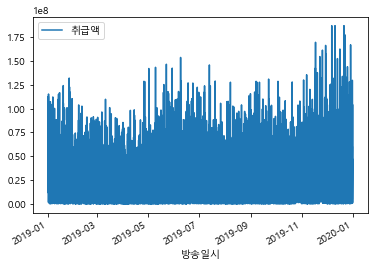

In [130]:
df.plot(x='방송일시', y ='취급액')

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


AttributeError: 'Figure' object has no attribute 'set_size_incehs'

<Figure size 432x288 with 0 Axes>

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


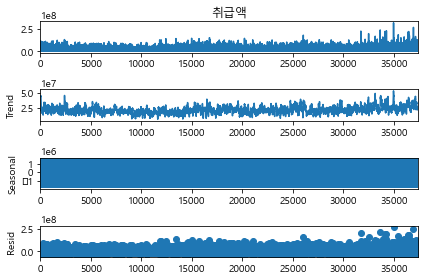

In [144]:
decomposition = seasonal_decompose(df.취급액, freq=63)

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_incehs(12,16)

In [126]:
import statsmodels.api as sm

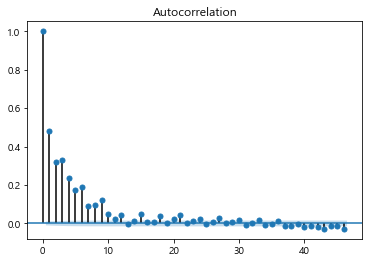

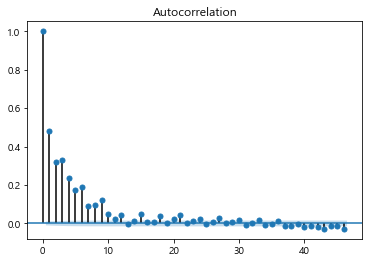

In [128]:
sm.tsa.graphics.plot_acf(df.취급액)

In [142]:
mod = sm.tsa.SARIMAX(df['취급액'],order=(0,2,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                  취급액   No. Observations:                37372
Model:             SARIMAX(0, 2, 0)x(1, 1, [1], 12)   Log Likelihood             -701665.773
Date:                              Thu, 03 Sep 2020   AIC                        1403337.547
Time:                                      22:11:31   BIC                        1403363.131
Sample:                                           0   HQIC                       1403345.671
                                            - 37372                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0830      0.007     12.218      0.000       0.070       0.096
ma.S.L12      -0.99

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


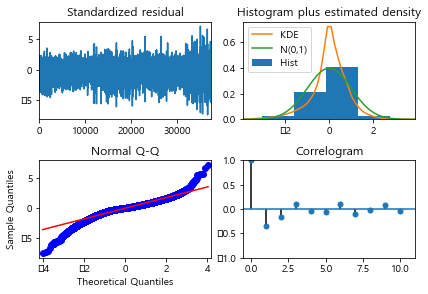

In [139]:
results.plot_diagnostics();
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

## fbprophet

In [147]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [146]:
! pip install pystan

! pip install fbprophet


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 37371
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    37372 non-null  int64  
 1   Unnamed: 0.1  37372 non-null  int64  
 2   방송일시          37372 non-null  object 
 3   노출(분)         37372 non-null  float64
 4   마더코드          37372 non-null  int64  
 5   상품코드          37372 non-null  int64  
 6   상품명           37372 non-null  object 
 7   상품군           37372 non-null  object 
 8   판매단가          37372 non-null  int64  
 9   취급액           37372 non-null  int64  
 10  월             37372 non-null  int64  
 11  일             37372 non-null  int64  
 12  요일            37372 non-null  int64  
 13  수량            37372 non-null  float64
 14  의류            37372 non-null  int64  
 15  주방            37372 non-null  int64  
 16  가구            37372 non-null  int64  
 17  건강기능          37372 non-null  int64  
 18  가전            37372 non-nu

In [174]:
df['방송일시'] = pd.to_datetime(df['방송일시'])

In [180]:
data = df[['방송일시', '취급액']].reset_index(drop=True)
data

,방송일시,취급액
0,2019-01-01 06:00:00,2099000
1,2019-01-01 06:00:00,4371000
2,2019-01-01 06:20:00,3262000
3,2019-01-01 06:20:00,6955000
4,2019-01-01 06:40:00,6672000
...,...,...
37367,2019-12-31 23:40:00,10157000
37368,2020-01-01 00:00:00,50929000
37369,2020-01-01 00:00:00,104392000
37370,2020-01-01 00:00:00,13765000


In [182]:
data = data.rename(columns = {'방송일시':'ds', '취급액':'y'})
data.head()

,ds,y
0,2019-01-01 06:00:00,2099000
1,2019-01-01 06:00:00,4371000
2,2019-01-01 06:20:00,3262000
3,2019-01-01 06:20:00,6955000
4,2019-01-01 06:40:00,6672000


### 1년치 취급액

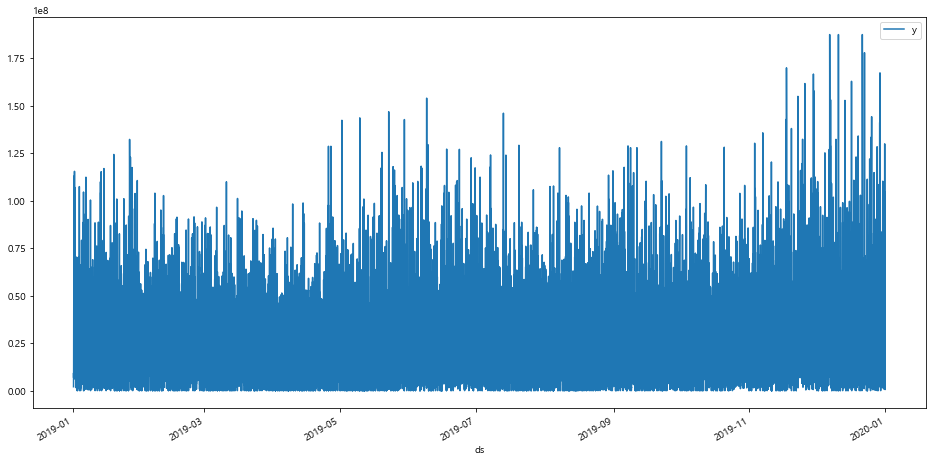

In [186]:
data.plot(x='ds', y='y' ,figsize=(16,8))

In [200]:
model = Prophet()
model.fit(data) # 모델 데이터 학습

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [194]:
future = model.make_future_dataframe(periods=180) 
#  make_future_dataframe 데이터 예측 
# 180 일 뒤를 예측 

forecast = model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
37547,2020-06-25,3.835246e+07,1.188102e+07,6.297652e+07,2.614453e+07,5.009917e+07,-2.419447e+06,-2.419447e+06,-2.419447e+06,-1.953358e+06,-1.953358e+06,-1.953358e+06,-4.660888e+05,-4.660888e+05,-4.660888e+05,0.0,0.0,0.0,3.593301e+07
37548,2020-06-26,3.842277e+07,1.002445e+07,6.332231e+07,2.615855e+07,5.028498e+07,-3.294900e+06,-3.294900e+06,-3.294900e+06,-1.953358e+06,-1.953358e+06,-1.953358e+06,-1.341542e+06,-1.341542e+06,-1.341542e+06,0.0,0.0,0.0,3.512787e+07
37549,2020-06-27,3.849308e+07,9.646737e+06,6.719157e+07,2.615078e+07,5.047411e+07,-1.620764e+06,-1.620764e+06,-1.620764e+06,-1.953358e+06,-1.953358e+06,-1.953358e+06,3.325935e+05,3.325935e+05,3.325935e+05,0.0,0.0,0.0,3.687232e+07
37550,2020-06-28,3.856339e+07,1.286997e+07,6.673667e+07,2.610526e+07,5.065796e+07,1.253441e+06,1.253441e+06,1.253441e+06,-1.953358e+06,-1.953358e+06,-1.953358e+06,3.206799e+06,3.206799e+06,3.206799e+06,0.0,0.0,0.0,3.981683e+07
37551,2020-06-29,3.863370e+07,1.053146e+07,6.531238e+07,2.605768e+07,5.081510e+07,-1.563363e+06,-1.563363e+06,-1.563363e+06,-1.953358e+06,-1.953358e+06,-1.953358e+06,3.899949e+05,3.899949e+05,3.899949e+05,0.0,0.0,0.0,3.707034e+07


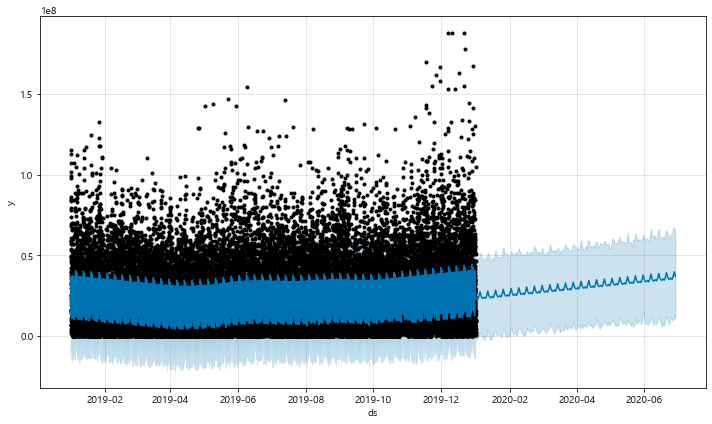

In [212]:
# 시각화 
from fbprophet.plot import add_changepoints_to_plot

fig1=model.plot(forecast)

In [196]:
# 검은 점이 데이터의 취급액들
# 파란색이 트랜드를 보여줌 
# 내가 넣은 데이터는 2019년 데이터 이기 떄문에 검은점이 거기까지만 출력

C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


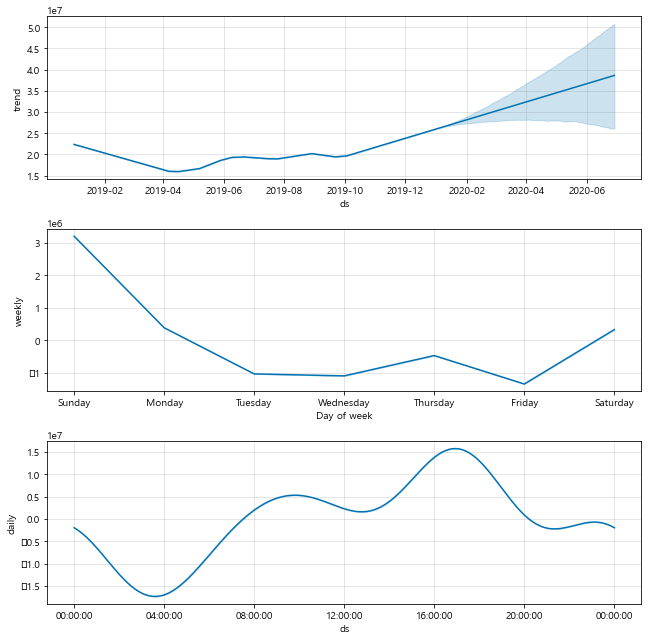

In [197]:
fig2 = model.plot_components(forecast)
# model.plot_components 예측에 영향을 준 요서를 출력

In [198]:
# tred를 통해서 지속적인 증가를 볼 수 있음.
# 주 데이터 영향을 많이 주는데 일요일과 토요일에 많은 수요를 얻는다. 
# 시간에 따라 수요의 차이가 큰데 17시가량에 많은 수요를 얻는다. 